# Frame Experiment Statistical Within Subject Analysis

<i>Created by Kristian G</i>

Preliminaries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ggplot import *
import json
from frame_experiment_table import FrameExperimentTable
from __future__ import division

In [2]:
# %pylab inline
import rpy2.robjects.lib.ggplot2 as ggplot2
%load_ext rpy2.ipython
%reload_ext rpy2.ipython


import pylab
import seaborn as sns
sns.set_style("whitegrid")
sns.set(style="ticks", font='serif')
sns.set_context("poster", font_scale=1.5)
%R rm(list=ls())

In [3]:
import rpy2.rinterface as rinterface

#### Other Tests
- [Usability Evaluation](Usability_evaluation.ipynb): Testing the two interfaces are equal in terms of Usability.
- [Regret evaluation](Regret_evaluation.ipynb): Evaluating regret
- [SSC evaluation](SCC_Statistical_Analysis.ipynb): Evaluation of SCC
- [Model Selection](Model Selection_2x2_CO_Ordinal_response.ipynb): Which type fo modelling should we use.
- [Descriptive stats](Descriptive_Analysis.ipynb): 
- [Scenarios Comparison](Scenarios_analysis.ipynb):
- [interaction analysis](Interaction_by_interaction_analysis.ipynb):

# EF Analysis


Emphasis framing Analysis (EF) referes to the analysis of the of the treatment usig the Emphaisi framing this is the  framing the interface design.

We run this analysis using 3 different datasets: Old Scenario, the New Scenario and the Both Scenarios at the same time.

- Old Scenario: data collected under the  old scenario does not makes explicit the element of competition in the experiment setup.
- New Scenario: data collected under the new sceneario is that in which the subjects are frame to consider competition in the experiment.
- Full: data putting together both scenarios.

In order to check each scenario we fitted the data to Cummulitative link mixed model for ordinal data. Then we review the coeffients, p-values and Likehood ratio of the treatment in the old and new scenario. For the full dataset we include the scenario type in the model as a new variable to check if this variable was significant.





## Loading New Scenario dataset (NSD)

In [4]:
picture_foler = "/Users/kristian/Dropbox/exp_frame_effects/Images/"
new = 1
if new == 0: 
    f = FrameExperimentTable('logs/data_incremental_file')
    f.add_records('logs/data_two_records','new')
    f.add_records_csv('logs/data_scramble_filled_csv.csv')
else:
    f = FrameExperimentTable('logs/data_scenario_changed')
f.filter_noise()
f.code_for_stat_ana()
f.code_survey_numeric()
new_data = f.get_rm_ws_dataframe()

(55, 40)
classify_field - Fields Excluded
(6,)
Total
Removing testing
Removing Random
Removing Not Life Sciences
Removing Not enlgish skilled
Removing Not Honest
Removing unaware
Removing Not answer
Removing Not answer
4    52
3     9
2     7
dtype: int64


/Users/kristian/miniconda/lib/python2.7/site-packages/pandas/util/decorators.py:81: FutureWarning: the 'cols' keyword is deprecated, use 'subset' instead
  warnings.warn(msg, FutureWarning)


In [5]:
##f.get_anadata().loc[::,'data_file_title_2':]
f.get_anadata()[["materials_type",]].to_csv('materials_type')


## Demogrpahics

#### who took the second treatent

In [6]:
xx = f.get_rm_ws_df('when_to_1','when_to_2')
z = pd.DataFrame({'count' : xx.groupby( [ "trt","response"] ).size()}).reset_index()
print z
print np.sum(z['count'])
np.sum(z['count'][z.response == 'nan'])


nan    53
6m      6
10y     5
1y      3
3y      1
dtype: int64
  trt response  count
0   A      10y      4
1   A       1y      2
2   A       6m      3
3   A      nan     25
4   B      10y      1
5   B       1y      1
6   B       3y      1
7   B       6m      3
8   B      nan     28
68


53

/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: reshape

  res = super(Function, self).__call__(*new_args, **new_kwargs)


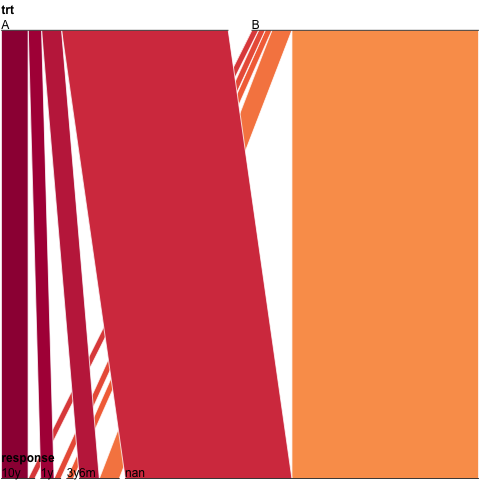

In [7]:
%%R -i z
source('parallel_plot.r')
with(z, parallelset(trt,response, freq=count, alpha=0.2))


In [8]:

sequ_AB = f.code_for_stat_ana()[f.code_for_stat_ana().treatment_eval_1 == 'B'][['year_born','discipline','man_hours','field']]
sequ_BA = f.code_for_stat_ana()[f.code_for_stat_ana().treatment_eval_1 == 'A'][['year_born','discipline','man_hours','field']]
# sequ_AB = sequ_AB[['year_born','discipline','man_hours','field']]
# sequ_BA = sequ_BA[['year_born','discipline','man_hours','field']]

print sequ_AB.describe(include='all')
print sequ_BA.describe(include='all')

          year_born      discipline   man_hours           field
count     18.000000              18   17.000000              18
unique          NaN              14         NaN              13
top             NaN  Bioinformatics         NaN  bioinformatics
freq            NaN               3         NaN               5
mean    1977.333333             NaN   33.941176             NaN
std       10.215329             NaN   37.776432             NaN
min     1954.000000             NaN   10.000000             NaN
25%     1972.250000             NaN   10.000000             NaN
50%     1981.000000             NaN   20.000000             NaN
75%     1985.750000             NaN   30.000000             NaN
max     1989.000000             NaN  150.000000             NaN
          year_born      discipline   man_hours           field
count     16.000000              16   15.000000              16
unique          NaN              10         NaN               9
top             NaN  Bioinformatics     

In [9]:

dd= f.code_for_stat_ana()[['year_born','treatment_eval_1']]


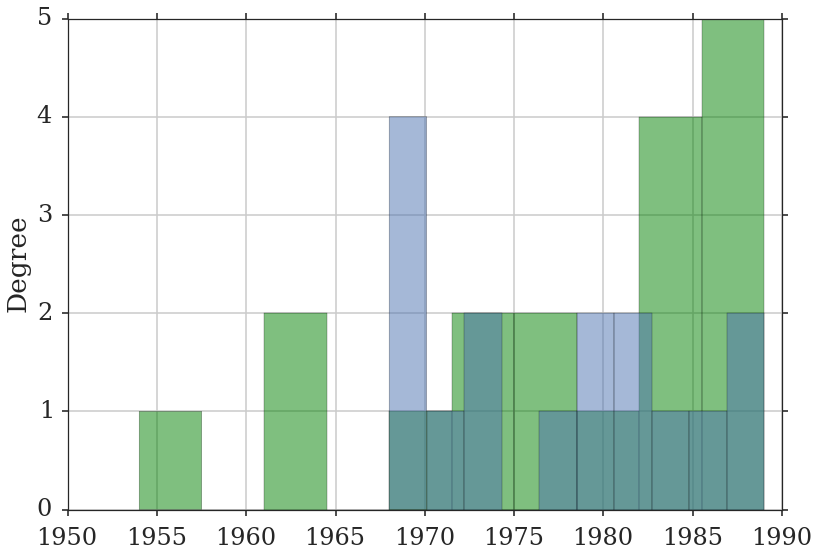

In [10]:
sequ_AB_year = sequ_AB['year_born']
sequ_BA_year = sequ_BA['year_born']

sequ_AB_year.plot(kind='hist', alpha=0.5, color="green")
sequ_BA_year.plot(kind='hist', alpha=0.5)
sequ_AB_year = sequ_AB_year[0:19]





In [11]:
%%R -i  dd  -o out
year_born_wt<-wilcox.test(dd$year_born ~ dd$treatment_eval_1, conf.int = TRUE, conf.level = 0.95)
print(year_born_wt)
print(year_born_wt$p.value)
out <- year_born_wt$p.value


	Wilcoxon rank sum test with continuity correction

data:  dd$year_born by dd$treatment_eval_1
W = 129, p-value = 0.6164
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -6.999951  5.999962
sample estimates:
difference in location 
             -1.999991 

[1] 0.6164073


> They are same distribution

In [12]:
print out

[ 0.61640734]


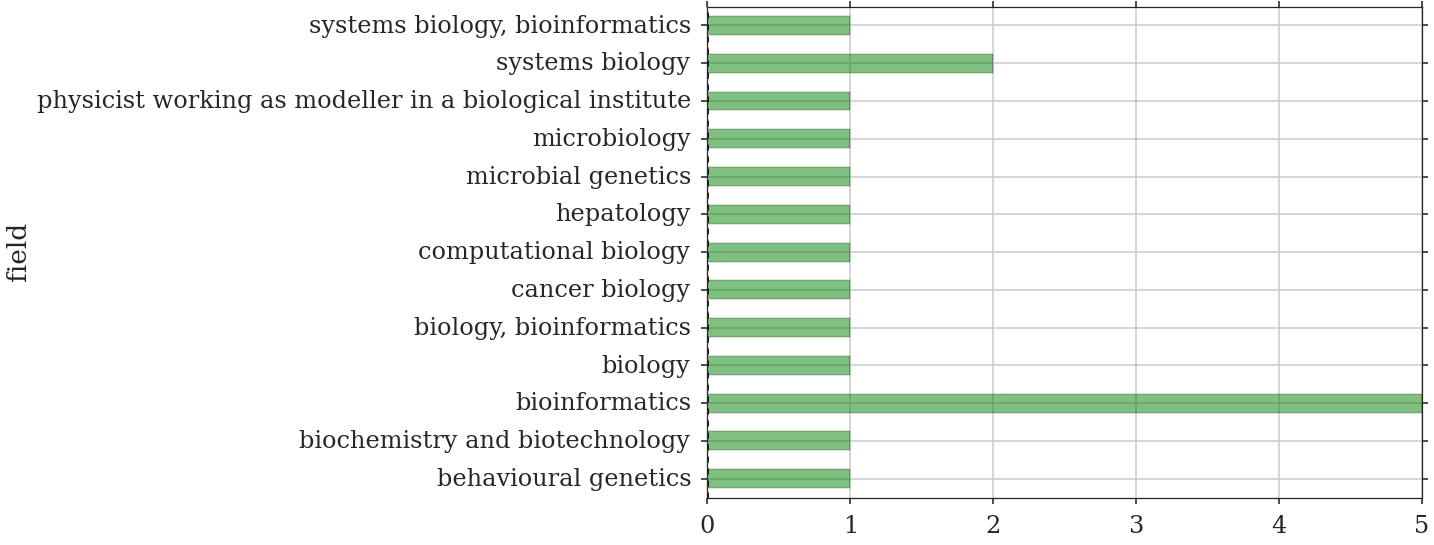

In [13]:
sequ_AB_disc = sequ_AB.groupby('field')['field'].count()
sequ_BA_disc = sequ_BA.groupby('field')['field'].count()

sequ_AB_disc.plot(kind='barh', alpha=0.5, color="green")

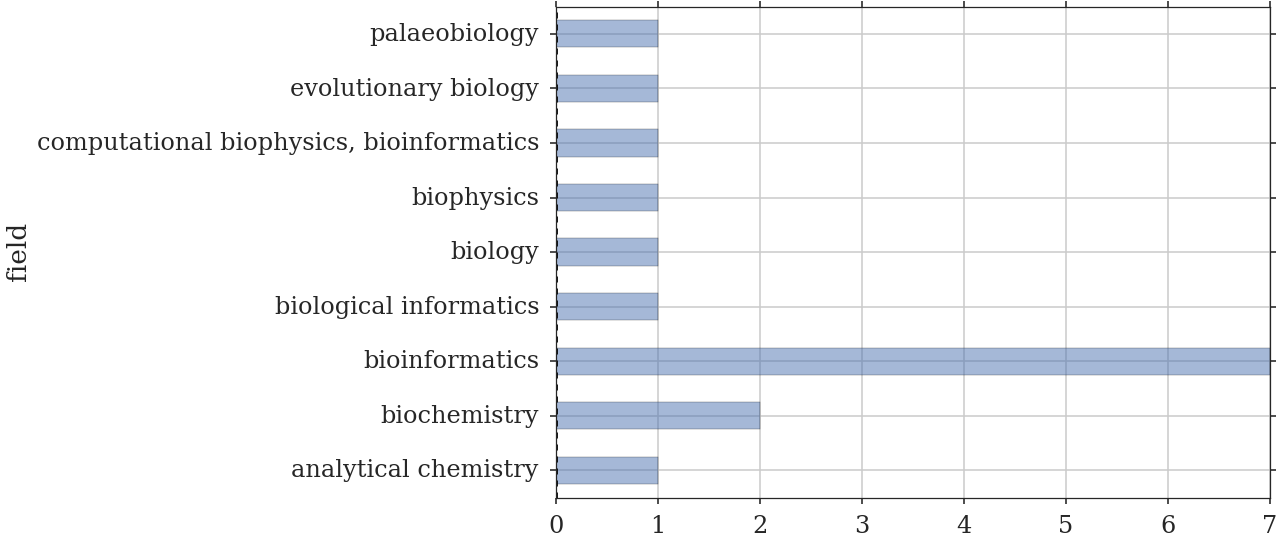

In [14]:
sequ_BA_disc.plot(kind='barh', alpha=0.5)

In [15]:
seqf = sequ_AB['field'].tolist()
seqs = sequ_BA['field'].tolist()
seqf = seqf[0:19]

In [16]:
%%R -i  seqf -i seqs
library(MASS) 
tbl = table(seqf, seqs) 
tbl
chisq.test(tbl) 


Error in table(seqf, seqs) : all arguments must have the same length


/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in table(seqf, seqs) : all arguments must have the same length

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: In addition: 
  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Warning messages:

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 1: 
  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: In wilcox.test.default(x = c(1980, 1971, 1989, 1970, 1981, 1968,  :
  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/kri

> the same distibution

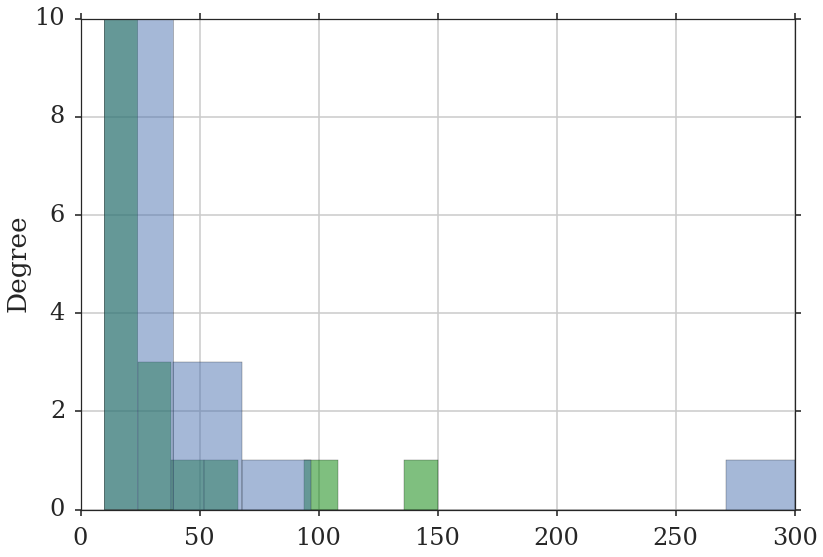

In [17]:
seqf = sequ_AB['man_hours']
seqs = sequ_BA['man_hours']

seqf.plot(kind='hist', alpha=0.5, color="green")
seqs.plot(kind='hist', alpha=0.5)

In [18]:
%%R -i  seqf -i seqs
wilcox.test(seqf, seqs, conf.int = TRUE, conf.level = 0.95)


	Wilcoxon rank sum test with continuity correction

data:  seqf and seqs
W = 105, p-value = 0.4026
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -19.999962   8.999962
sample estimates:
difference in location 
             -3.999962 



>same distibution

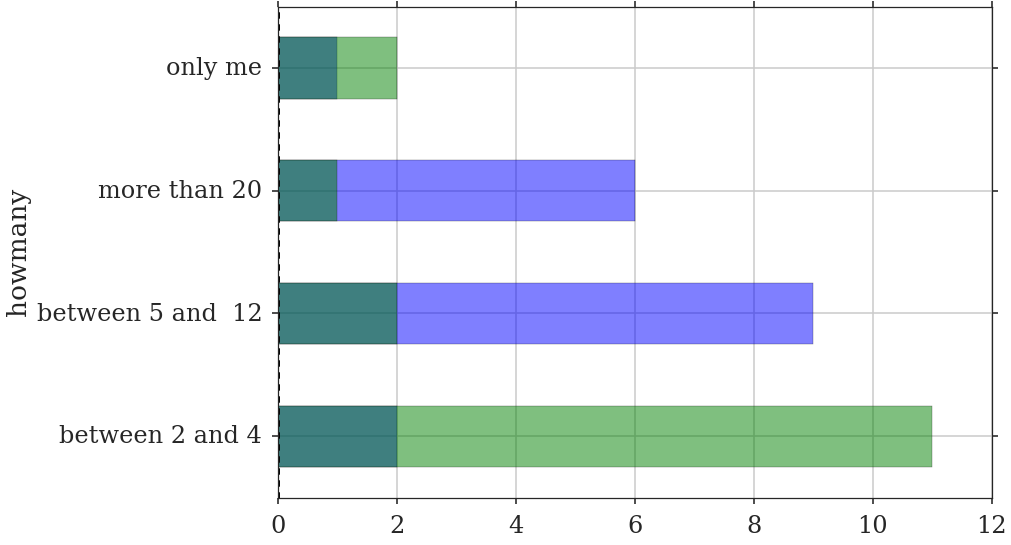

In [19]:
howmany =  f.code_for_stat_ana()[['howmany','treatment_eval_1']]

# seqf = sequ_AB['man_hours']
# seqs = sequ_BA['man_hours']
howmanyAB = howmany[howmany['treatment_eval_1'] == 'A'].groupby('howmany')['howmany'].count()
howmanyBA = howmany[howmany['treatment_eval_1'] == 'B'].groupby('howmany')['howmany'].count()

howmanyBA.sort_index().plot(kind='barh', alpha=0.5, color="blue")
howmanyAB.sort_index().plot(kind='barh', alpha=0.5, color="green")
# seqs.plot(kind='hist', alpha=0.5)

In [20]:
%%R -i  howmanyAB -i howmanyBA
library(MASS) 
tbl = table(howmanyAB, howmanyBA) 
tbl
chisq.test(tbl) 


	Pearson's Chi-squared test

data:  tbl
X-squared = 8, df = 6, p-value = 0.2381



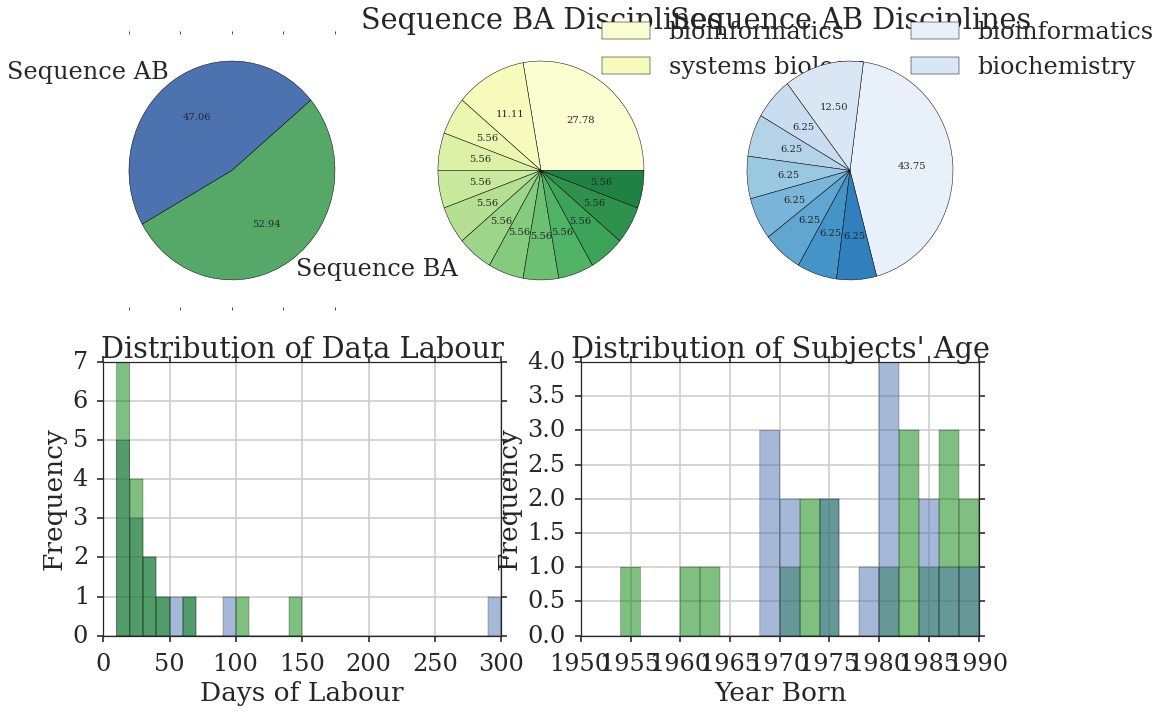

In [21]:
from matplotlib import pyplot as pl
from matplotlib import cm
import pylab
import seaborn as sns
rs = np.random.RandomState(50)

fig = pl.figure()
fig.subplots_adjust(bottom=0.025, left=0.025, top = 0.975, right=0.975)

pl.subplot(2, 3, 1)
xx = f.code_for_stat_ana().groupby('treatment_eval_1').count()
rd = xx['ease_1'].plot(kind='pie',label="", subplots=True,autopct='%.2f', labels=["Sequence AB","Sequence BA"],  startangle=40)


pl.subplot(2, 3, 2)
sequ_AB_disc.sort(ascending=False )
ww = sequ_AB_disc.plot(kind='pie',autopct='%.2f',label="",colors=sns.color_palette("YlGn",16),labels=None, title="Sequence BA Disciplines", startangle=0)
ww.legend(['bioinformatics','systems biology'], loc=(0.7, 0.8), shadow=True)



pl.subplot(2, 3, 3)
sequ_BA_disc.sort(ascending=False)
d = sequ_BA_disc.plot(kind='pie',label="", autopct='%.2f',colors=sns.color_palette("Blues",12),labels=None, title="Sequence AB Disciplines", startangle=-75)
d.legend(['bioinformatics','biochemistry'], loc=(0.7, 0.8), shadow=True)

# print d.__dict__

pl.subplot(2, 2, 3)
seqs.plot(kind='hist', alpha=0.5, title="Distribution of Data Labour", bins=np.arange(min(seqs), max(seqs) + 10, 10))
dd = seqf.plot(kind='hist', alpha=0.5, color="green", bins=np.arange(min(seqf), max(seqf) + 10, 10))
dd.set_ylabel('Frequency')
dd.set_xlabel('Days of Labour')

pl.subplot(2, 2, 4)
sequ_AB_year.plot(kind='hist', alpha=0.5, color="green", title="Distribution of Subjects' Age", bins=np.arange(min(sequ_AB_year), max(sequ_AB_year) + 2, 2))
ss = sequ_BA_year.plot(kind='hist', alpha=0.5, bins=np.arange(min(sequ_BA_year), max(sequ_BA_year) + 2, 2))
ss.set_ylabel('Frequency')
ss.set_xlabel('Year Born')


#### First Period comparison

In [22]:
full_set = f.get_rm_ws_dataframe()
full_set['response'] = full_set['response'].replace([1,2,3,4],['private','collaborators','stakeholders','public'])
B = pd.DataFrame({'Treatment' : full_set.response[(full_set['trt'] == 'B') & (full_set['period'] == '1')] })
A = pd.DataFrame({'Control' :full_set.response[(full_set['trt'] == 'A') & (full_set['period'] == '1')] })

4    52
3     9
2     7
dtype: int64


/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: likert

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: xtable

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The reshape package was found on the search path. It is recommended
that you detach this package as it causes conflicts with the reshape2
package. You can detach using the following R command:
    detach('package:reshape') 

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/kristian/miniconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘plyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/kristian/miniconda/

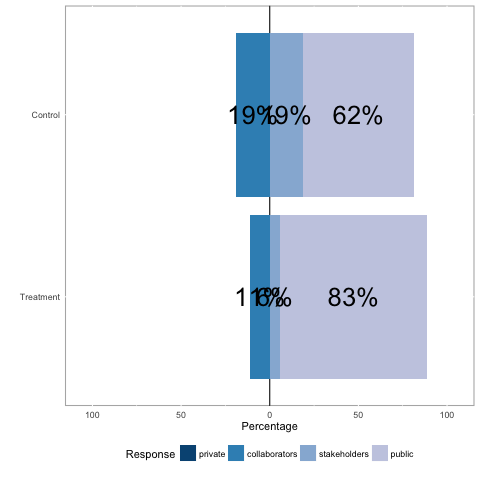

In [23]:
%%R -i B -i A
source("stacked_bars.R")
graph_with_who(B, A, "Accessibility Comparison (Period: 1)")

#### Sequence BA

In [24]:
B = pd.DataFrame({'Treatment' : full_set.response[(full_set['trt'] == 'B') & (full_set['period'] == '1')] })
A = pd.DataFrame({'Control' :full_set.response[(full_set['trt'] == 'A') & (full_set['period'] == '2')] })

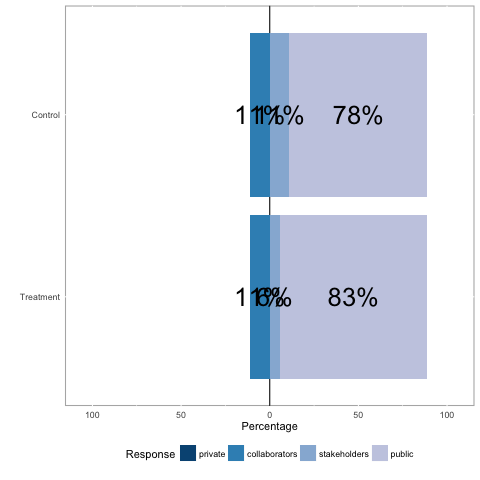

In [25]:
%%R -i B -i A
source("stacked_bars.R")
graph_with_who(B, A,"Accessibility Comparison (Sequence: EXP-CTRL)")

#### Sequence AB

In [26]:
B = pd.DataFrame({'Treatment' : full_set.response[(full_set['trt'] == 'B') & (full_set['period'] == '2')] })
A = pd.DataFrame({'Control' :full_set.response[(full_set['trt'] == 'A') & (full_set['period'] == '1')] })

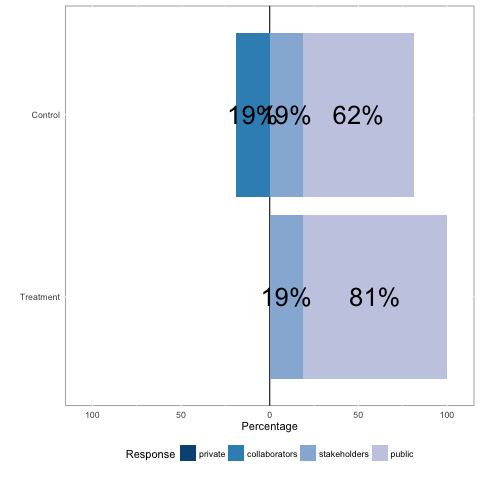

In [27]:
%%R -i B -i A
source("stacked_bars.R")
graph_with_who(B, A,"Accessibility Comparison (Sequence:CRTL-EXP)")

In [28]:
%%R 
rm(list=ls())

## Carry Over effect check

Just frist interaction for sequence

In [29]:
co_check_df = new_data
#co_check_df = new_data[new_data['period'] == '1']
new_data = f.get_rm_ws_dataframe()

4    52
3     9
2     7
dtype: int64


In [ ]:
new_data.sort('id')

ss =  f.code_for_stat_ana()
ss['sequ'] = ss['treatment_eval_1']
ss['sequ'] = ss['sequ'].replace(['A','B'],['AB','BA'])
ss['sum']  = ss['with_who_1'].astype('int') + ss['with_who_2'].astype('int')
ss['diff'] =  ss['with_who_1'].astype('int') - ss['with_who_2'].astype('int')
xx =  ss[['treatment_eval_1','diff','sum']]


# ss =  ss[['sequ','diff','sum']]

# AB = ss[ss['sequ'] == 'AB']
# BA = ss[ss['sequ'] == 'BA']

AB = xx[xx['treatment_eval_1'] == 'A']
BA = xx[xx['treatment_eval_1'] == 'B']


sum1= AB['sum'].sum()/AB.shape[0]
sum2= BA['sum'].sum()/BA.shape[0]
diff1= AB['diff'].sum()/AB.shape[0]
diff2= BA['diff'].sum()/BA.shape[0]

print sum1 - sum2
print (diff1 - diff2)/2

# xx.boxplot(column=['sum'], by=['treatment_eval_1'])
# xx.boxplot(column=['diff'], by=['treatment_eval_1'])



However the test does not find the carryover effect significant.  
We use **wilcox rank sum (‘Mann-Whitney’)** because is for a non-parametric ordinal variables.   
The test is not paired is between the sequences.  



In [ ]:
%%R -i ss -o wtpv

print(aggregate(ss$sum, by=list(ss$treatment_eval_1), mean))

wt<-wilcox.test(ss$sum~factor(ss$treatment_eval_1),paired = FALSE)


print(wt)


wtpv<-wt$p.value

print(wt$p.value)


print(wilcox.test(ss$diff~factor(ss$treatment_eval_1),paired = FALSE))

print(wilcox.test(ss$with_who_1~factor(ss$treatment_eval_1),paired = FALSE, alternative ="g"  ))



By observation we can see that there is a Positive Carry-over effect.  
I use the **mean** because we are with ordinal variables but should i use the **median** i get no differences.

In [ ]:
ll =  ss[['sequ','with_who_1','with_who_2']]

ll.columns = ['Sequence',"Period 1","Period 2"]
ll['Sequence'] = ll['Sequence'].replace(['AB','BA'],['Ctrl-Exp','Exp-Ctrl'])


ax = ll.groupby(['Sequence']).mean().transpose().plot(marker='o')
ax.set_xlim(np.array([-0.5, 0.5]) + ax.get_xlim() )
ax.set_ylabel("Accessibility (Sum of Means)")
ax.set_xticklabels(["",'Period 1',"",'Period 2',""])
wtpv1="p-v= "+ str(round(wtpv[0],3))
ax.text(1,3.625,wtpv1, fontsize=20)

savefig(picture_foler+'accessibilityCarryPlt.png', bbox_inches='tight', dpi=200)
pax1 = ll.groupby(['Sequence']).median().transpose().plot()
pax1.set_ylabel("Accessibility (Sum of Medians)")
pax1.set_xlim(np.array([-0.5, 0.5]) + ax.get_xlim() )
pax1.set_xticklabels(["",'Period 1',"",'Period 2',""])



>The possible carryover effects is not significantly different between sequcnes

>

In [ ]:
%%R -i co_check_df
library(ordinal)


s <- data.frame(co_check_df)
s$response <- factor(s$response)
s$trt <- factor(s$trt)
s$sequ <- factor(s$sequ)
s$period <- factor(s$period)

clm <- clm(response ~ sequ  , data=s, link="probit",Hess = TRUE, nAGQ = 7, threshold="flexible"  )

print (summary(clm))
exp(cbind(OR =coef(clm), confint(clm)))
print(exp(cbind(OR =coef(clm), confint(clm))))

>Carryover effect is not significant

## Check for best fit Link function
The hieesgt log-likehood (more positive) is the one provided by loglog this indicates that this distribution provdes a better fiting of the distribution at hand.

In [ ]:
%%R -i new_data

s <- data.frame(new_data)
s$response <- factor(s$response)
s$trt <- factor(s$trt)
s$sequ <- factor(s$sequ)
s$period <- factor(s$period)


##links <- c("logit", "probit", "cloglog", "loglog", "cauchit")
links <- c("logit", "probit","loglog" )
sapply(links, function(link) {  dd<-clmm(response ~ trt + period + sequ + (1 | id:sequ), s, link=link ,Hess = TRUE, nAGQ = 7, threshold="flexible")
                              
                              dd$logLik })



> Probit is the best fitted

## Check for best fit threshold 
The hieesgt log-likehood (more positive) is the one provided by loglog this indicates that this distribution provdes a better fiting of the distribution at hand.

In [ ]:
%%R -i new_data

s <- data.frame(new_data)
s$response <- factor(s$response)
s$trt <- factor(s$trt)
s$sequ <- factor(s$sequ)
s$period <- factor(s$period)
s$id <- factor(s$id)

thresholds <- c("equidistant", "symmetric2")
 

anov<-function(threshold){
mt2 <- clmm(response ~ trt + period + sequ + (1 | id:sequ), s, link="probit" ,Hess = TRUE, nAGQ = 7, threshold=threshold)
x1  <- clmm(response ~ trt + period + sequ + (1 | id:sequ), s, link="probit" ,Hess = TRUE, nAGQ = 7, threshold="flexible")
summa<-anova(x1, mt2)
summa$'Pr(>Chisq)'
}
sapply(thresholds, anov)




## Running Logistic Regression (NSD)

In [ ]:
%%R -i new_data
library(ordinal)


    s <- data.frame(new_data)
    s$response <- factor(s$response)
    s$trt <- factor(s$trt)
    s$sequ <- factor(s$sequ)
    s$period <- factor(s$period)

    ##s <- within(s, Grp <- factor(id:sequ))

    mm4 <- clmm(response ~ sequ + period + trt + (1 | id:sequ), s, link="probit",Hess = TRUE, nAGQ = 7, threshold="flexible"  )
    ##mm4 <- clmm2(response ~ trt + period + sequ, random=id,data= s, link="probit",Hess = TRUE, nAGQ = 8, threshold="flexible"  )
    
    print (summary(mm4))
    exp(cbind(OR =coef(mm4), confint(mm4)))
    print(exp(cbind(OR =coef(mm4), confint(mm4))))




In [ ]:
%%R
source('regression_plots.r')


plot_odds(mm4,'Odds ratios and CI')

##rm(list=ls())

###Check ODDs Ratios (NSD) -- using Likehood ratio test instead of Wald stat

In [ ]:
%%R -i new_data -o mm7 -o mm4


    s <- data.frame(new_data)
    s$response <- factor(s$response)
    s$trt <- factor(s$trt)
    s$sequ <- factor(s$sequ)
    s$period <- factor(s$period)

    ##s <- within(s, Grp <- factor(id:sequ))
    mm7 <-clmm(response ~ sequ + period + (1 | id:sequ), s,  link="probit",Hess = TRUE, nAGQ = 7, threshold="flexible" )
    print (summary(mm7))
    print(exp(cbind(OR =coef(mm7), confint(mm7))))

print(anova(mm4, mm7))


> the treatment effect is present !!


In [ ]:
%%R

library(texreg)
source('clmm_extractor.r')

texreg(list(mm7,mm4), ci.force = TRUE, ci.test = 1, ci.force.level = 0.95 , float.pos = "tb",
      caption = "Enforcing confidence intervals.",  use.packages = FALSE, single.row = FALSE, custom.coef.names=c("Sequence","Period","Treatment"),
      custom.model.names = c("OLS model", "GLS model"),)



In [ ]:
new_data = f.get_rm_ws_dataframe()

##Testing for random effects of subjects

In [ ]:
%%R -i new_data
library(ordinal)

    s <- data.frame(new_data)
    s$response <- factor(s$response)
    s$trt <- factor(s$trt)
    s$sequ <- factor(s$sequ)
    s$period <- factor(s$period)

    mm4x <- clmm2(response ~ trt + period + sequ, random=id, data=s, link="probit",Hess = TRUE, nAGQ = 7 )
    mmx <- clm2(response ~ trt + period + sequ, data= s, link="probit",Hess = TRUE )
    print (summary(mm4x))
#   print(exp(cbind(OR =coef(mm4x), confint(mm4x))))



print(anova(mm4x, mmx))
#plot_odds(mm4x,'Odds ratios and CI')



> Subjects are also significant, thats bad

In [ ]:
%%R

## how to use profile
## http://www.inside-r.org/packages/cran/ordinal/docs/profile.clmm

##pr2 <- profile(mm4x, range=c(.1,20), nsteps= 30,trace=1)
pr2 <- profile(mm4x, range=c(.1,10), nsteps= 30,trace=1)
print(confint(pr2))
plot(pr2)

In [ ]:
%%R
n=40
ci <- mm4x$ranef + qnorm(0.975) * sqrt(mm4x$condVar) %o% c(-1, 1)
ord.re <- order(mm4x$ranef)
ci <- ci[order(mm4x$ranef),]
plot(1:n, mm4x$ranef[ord.re], axes=FALSE, ylim=range(ci),
      xlab="Subject", ylab="Subject effect")

axis(1, at=1:n, labels = ord.re)
axis(2)
for(i in 1:n) segments(i, ci[i,1], i, ci[i, 2])
abline(h = 0, lty=2)
    


In [ ]:
%%R -i new_data


    s <- data.frame(new_data)
    s$response <- factor(s$response)
    s$trt <- factor(s$trt)
    s$sequ <- factor(s$sequ)
    s$period <- factor(s$period)
    ##s <- within(s, Grp <- factor(id:sequ))

    mm4y <- clm(response ~ trt + period + sequ, data=s, link="probit",Hess = TRUE, nAGQ = 7  )
    print (summary(mm4y))
#   print(exp(cbind(OR =coef(mm4x), confint(mm4x))))



#plot_odds(mm4x,'Odds ratios and CI')



In [ ]:
%%R
newdata <- s[order(s$id),]

head(cbind(newdata, fitted(mm4y)))
head(cbind(newdata, pred=predict(mm4y, newdata=newdata)))

In [ ]:
%%R
print(round(exp(mm4y$beta),1))
print(round(exp(confint(mm4y, type= "Wald")),1))
plot_odds(mm4y,'Odds ratios and CI')


In [ ]:
%%R
links <- c("logistic", "probit", "cloglog", "loglog")
sapply(links, function(link) {  clmm2(response ~ trt + period + sequ,random=id, data=s, link=link ,Hess = TRUE, nAGQ = 8)$logLik })



In [ ]:
%%R
rm(list=ls())

# Building model

Adding variable by variable to the model.

- Updating Assets
- Subjects Age
- Material (number of people involved in production of the material) 
- **Material (number of days involved in production of the material)**
- *Subjects Discipline*
- *Material's type*


In [ ]:
new_data = f.get_rm_ws_df('with_who_1','with_who_2')

full_set_var = f.add_survey_data(new_data,'man_hours')
full_set_var = f.add_survey_data(new_data,'field')
full_set_var = f.add_survey_data(full_set_var,'year_born')
full_set_var = f.add_survey_data(full_set_var,'trust')
full_set_var = f.add_survey_data(full_set_var,'updating')
# full_set_var['updating'].fillna(0, inplace=True)
##full_set_var['howmany'] = full_set_var['howmany'].replace(['only me','between 2 and 4','between 5 and  12','between 13 and 20','more than 20'],[1,2,3,4,5])

full_set_var = full_set_var.sort('sequ')
full_set_var['updating']=full_set_var['updating'].fillna(0)
# full_set_var.ix[np.random.choice(full_set_var.index.values, 10)]
full_set_var

In [ ]:
%%R -i full_set_var
library(ordinal)

s <- data.frame(full_set_var)
s$response <- factor(s$response)
s$trt <- factor(s$trt)
s$sequ <- factor(s$sequ)
s$period <- factor(s$period)
s$field <- factor(s$field)
s$man_hours <- as.numeric(s$man_hours)

model <- clmm(response ~ sequ  + trt + period  + (1 | id:sequ), s, Hess = TRUE, link='probit', nAGQ = 8  )
model.nonu <- clmm(response ~ sequ  + trt + period  + (1 | man_hours), s, Hess = TRUE, link='probit', nAGQ = 8 )
model.man_hours <- clmm(response ~ sequ  + trt + period  + (1 | id:sequ)+ (1 | man_hours), s, Hess = TRUE, link='probit' )
model.year_born <- clmm(response ~ sequ  + trt + period  + (1 | id:sequ)+ (1 | year_born), s, Hess = TRUE, link='probit' )
model.trust <- clmm(response ~ sequ  + trt + period  + (1 | id:sequ)+ (1 | trust), s, Hess = TRUE, link='probit' )
#model.updating <- clmm(response ~ sequ  + trt + period  + (1 | id:sequ)+ (1 | updating), s, Hess = TRUE, link='probit' )
model.disc <- clmm(response ~ sequ  + trt + period + (1 | field)  + (1 | id:sequ), s, Hess = TRUE, link='probit'  )
model.disc <- clmm(response ~ sequ  + trt + period + (1 | field)+ (1 | id:sequ), s, Hess = TRUE, link='probit'  )




In [ ]:
%%R
model.disc <- clmm(response ~ sequ + period + trt + (1 | field)+ (1 | man_hours) + (1 | id:sequ), s, Hess = TRUE, link='probit'  )
model.disc.no <- clmm(response ~ sequ + period + (1 | field)+ (1 | man_hours) + (1 | id:sequ), s, Hess = TRUE, link='probit'  )
anova(model.disc.no,model.disc)

In [ ]:
%%R

model <- clmm(response ~ sequ  + trt + period  + (1 | id:sequ), s, Hess = TRUE, link='probit' )

print(model$info$AIC)
print(model.nonu$info$AIC)
print(model.man_hours$info$AIC)
print(model.year_born$info$AIC)
print(model.trust$info$AIC)
print(model.disc$info$AIC)



print (summary(model.man_hours))
exp(cbind(OR =coef(model.man_hours), confint(model.man_hours)))
    
source('regression_plots.r')
print(plot_odds(model.man_hours,'Odds ratios and CI'))

print (summary(model.disc))
print(exp(cbind(OR =coef(model.disc), confint(model.disc))))
    
source('regression_plots.r')
plot_odds(model.disc,'Odds ratios and CI')

> when you control for man_hours and discipline the effects get reduced but is still present, so our problems from before might not exist. Maybe this work within all diciplines.

> byt controlling for this two variales you remove the variance from the subejcts

>Why is get less siginificant.

> Labour
> More minded towards using computaitonal

In [ ]:
%%R

library(texreg)
source('clmm_extractor.r')

texreg(list(mm7,mm4,model.disc), ci.force = TRUE, ci.test = 1, ci.force.level = 0.95 , float.pos = "tb",
      caption = "Accesibility CLM Models Comparison",  label="clmmEmphasisTbl",use.packages = FALSE, single.row = FALSE, custom.coef.names=c("Sequence","Period","Treatment"),
      custom.model.names = c("No Treatment","Treatment","Treatment w/Controls"),)


In [ ]:
%%R
ctl <- c(4.17,5.58,5.18,6.11,4.50,4.61,5.17,4.53,5.33,5.14)
trt <- c(4.81,4.17,4.41,3.59,5.87,3.83,6.03,4.89,4.32,4.69)
group <- gl(2, 10, 20, labels = c("Ctl","Trt"))
weight <- c(ctl, trt)
lm.D9 <- lm(weight ~ group)
lm.D90 <- lm(weight ~ group - 1)
texreg(list(lm.D9, lm.D90), override.se = 
    list(c(0.5, 0.5), c(0.5, 0.5)))